___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://bernardmarr.com/img/What%20is%20an%20Artificial%20Neural%20Networks.jpg" width="350px" height="180px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
#### <font color= #2E9AFE> `Martes y Viernes (Videoconferencia) de 13:00 - 15:00 hrs`</font>
- <Strong> Sara Eugenia Rodríguez </Strong>
- <Strong> Año </Strong>: 2024
- <Strong> Email: </Strong>  <font color="blue"> `cd682324@iteso.mx` </font>
___

<p style="text-align:right;"> Imagen recuperada de: https://bernardmarr.com/img/What%20is%20an%20Artificial%20Neural%20Networks.jpg</p>

### <font color= #2E9AFE> Tema: Redes Neuronales para Clasificación</font>

- Las redes neuronales para clasificación toman como salida valores discretos, generalmente valores binarios (0, 1)
- El principal cambio que debemos hacer para clasificación es cambiar la salida de la red neuronal. Se le pone una función de activación no lineal a la salida, generalmente se usa la función Sigmoidal. 
- Como función de costo se usa el Cross Entropy en lugar de la Suma de Residuales
- Si tenemos una salida multiclase, se debe usar la función Softmax en lugar de la sigmoidal

**Entonces... ¿qué pasaría si tengo una red neuronal con sólo una capa, donde la función de activación es sigmoidal? sería lo mismo que aplicar una regresión logística**

Red neuronal con una capa con función de activación sigmoidal = Regresión logística

<img style="float: center; margin: 0px 0px 15px 15px;" src="https://deeplearningmath.org/images/shallow_NN.png" width="450px" height="280px" />



**Funciones de activación**

El comportamiento de las neuronas de las redes neuronales es basado en la función en la que la neurona se especializó. Una neurona puede cambiar su respuesta dependiendo de la función de activación $\varphi(*)$ que sea seleccionada

Funciones comunes:
1. Lineal: $\varphi(\nu)=\nu$
2. Sigmoidal: $\varphi(\nu)=\frac{e^{\nu}}{1+e^{\nu}}$ 
3. Tanh: $\varphi(\nu)=\frac{e^{\nu}-e^{-\nu}}{e^{\nu}+e^{-\nu}}=tanh(\nu)$
4. Softplus: $\varphi(\nu)=log(1+e^{\nu})$
5. RELU: $\varphi(\nu)=max(0,\nu)$

Las funciones de activación suelen ser diferenciables, lo que significa que la derivada de primer orden se puede calcular para un valor de entrada dado. Esto es necesario dado que las redes neuronales generalmente se entrenan utilizando el algoritmo de backpropagation que requiere la derivada del error de predicción para actualizar los pesos del modelo.

**¿Cómo elegir la función de activación para las capas ocultas?**
 
- RELU: es la más utilizada para capas ocultas. Es fácil de calcular, lo que la hace más rápida para entrenar. Es simple de implementar y no es tan susceptible a gradientes que se desvanecen
- Leaky RELU: Similar a ReLU, pero permite valores negativos pequeños cuando x≤0, lo que evita que las neuronas queden completamente inactivas.
- Evita Sigmoid y Tanh en las capas ocultas

**¿Cómo elegir la función de activación para las capas de salida?**

- Lineal: Para problemas de regresión donde la salida es un valor continuo.
- Sigmoidal: típicamente para problemas de clasificación binaria.
- Softmax: Para problemas de clasificación multiclase


**¿Cómo son las redes neuronales para Clasificación?**

$$\nu^{1} = w_{0}^{1}+w^{1}$$
$$y^{1} = \varphi(\nu^{1})$$
$$\nu^{2} = w_{0}^{2}+w^{2}y_{1}$$
<font color= #2E9AFE>$$y^{2} = \varphi(\nu^{2})$$</font>

La única diferencia es la última salida. La función de la salida tiene que ser **sigmoidal o softmax**


**¿Cómo elegir cuántas capas ocultas?**

- Problemas sencillos: Una sola capa oculta suele ser suficiente para capturar patrones simples.
- Problemas más complejos (con relaciones no lineales más complicadas): Dos capas ocultas pueden ser útiles 

En la práctica, la mayoría de los problemas sencillos no necesitan más de 1 o 2 capas ocultas.

**¿Cómo elegir cuántas neuronas en las capas ocultas?**

- Un buen punto de partida es comenzar con un número de neuronas que sea similar o cercano al número de características de entrada.
- Para problemas simples, se puedes comenzar con entre 4 y 16 neuronas por capa.
- Si los datos tienen una cantidad moderada de complejidad o son no lineales, podrías aumentar a 32 o 64 neuronas en la capa oculta.
- Evita tener muchas más neuronas que características de entrada, ya que eso puede llevar a un sobreajuste.
- En redes con múltiples capas ocultas, una estrategia común es que las capas posteriores tengan menos neuronas que las capas iniciales. Esto es porque las primeras capas extraen más características, mientras que las capas más profundas se enfocan en combinarlas.

**Backpropagation**

Es el método que usa para ajustar el modelo. Minimiza el cross entropy, utilizando el gradiente descendente para calcular los parámetros con el orden del último hacia el primero.

**Recomendaciones**

- Se recomienda hacer un pre-procesamiento de los datos - Escalamiento
- Comúnmente todas las capas ocultas usan la misma función de activación
- La función de salida generalmente usa diferente función de activación que el de las capas ocultas. 
- En la experiencia, conviene más aumentar el número de neuronas ocultas en lugar de aumentar el número de capas ocultas.
- Se recomienda no usar muchas capas ocultas

**Ejemplo para salida binaria**

Queremos predecir si una persona va a tener diabetes o no (Outcome)

In [1]:
#Librerías
import tensorflow as tf
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'diabetes.csv')

In [3]:
desc = data.describe()
info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Exploración de datos


In [5]:
#cómo se ve la distribución de nuestra variable de salida
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

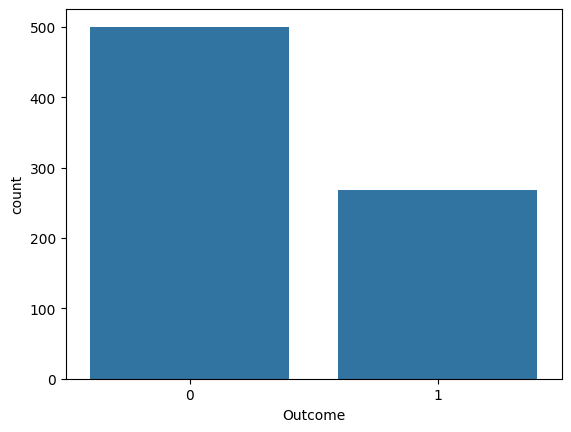

In [6]:
#graficando la distribucion de la variable a predecir
sns.countplot(x='Outcome', data=data)
plt.show()

No es un desbalanceo tan severo, por lo tanto no se recomendaría balancear la clase a predecir

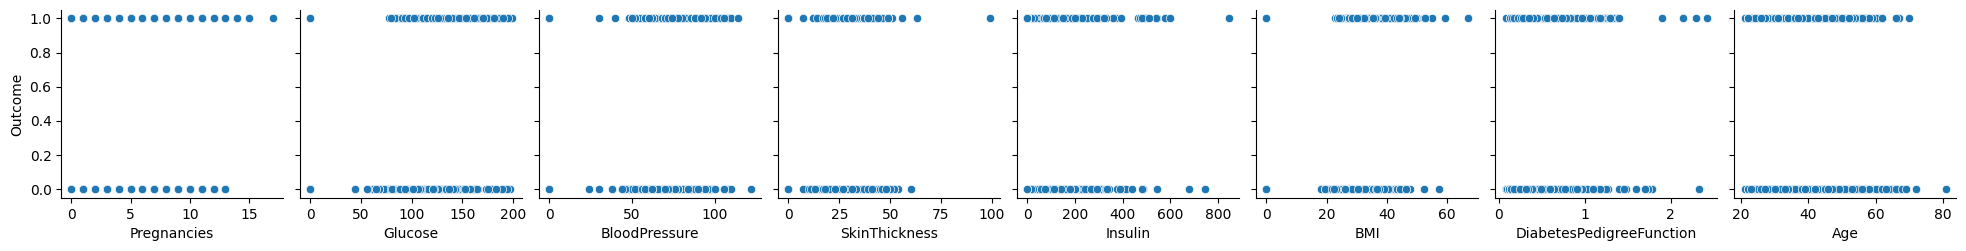

In [7]:
sns.pairplot(data=data,
                  y_vars=['Outcome'],
                  x_vars=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [8]:
#Seleccionar datos para train y test
X = data.iloc[:,0:8]
Y = np.ravel(data['Outcome'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

In [9]:
#La red neuronal se beneficia del escalamiento de las variables numéricas (si es necesario)
#Escalar datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
#cuántos datos tenemos?
X_train.shape

(537, 8)

Una recomendación es comenzar con un número de neuronas que sea similar o cercano al número de características de entrada.

In [11]:
#Construir red neuronal
from keras.models import Sequential
from keras.layers import Dense

# Crear estructura de la red neuronal
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(8,))) #tenemos 8 variables de entrada
model.add(Dense(1, activation='sigmoid')) #La capa de salida debe ser "sigmoidal" para problemas binomiales (0 y 1)

/Users/isavalladolid/.local/share/virtualenvs/isavalladolid-aOww6lJz/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Compilar el modelo
model.compile(loss='binary_crossentropy',#función de costo
              optimizer='adam',
              metrics=['accuracy'])

# Entrenamiento de la red neuronal
history = model.fit(X_train, Y_train, epochs=200, validation_data=(X_test, Y_test), verbose=0)


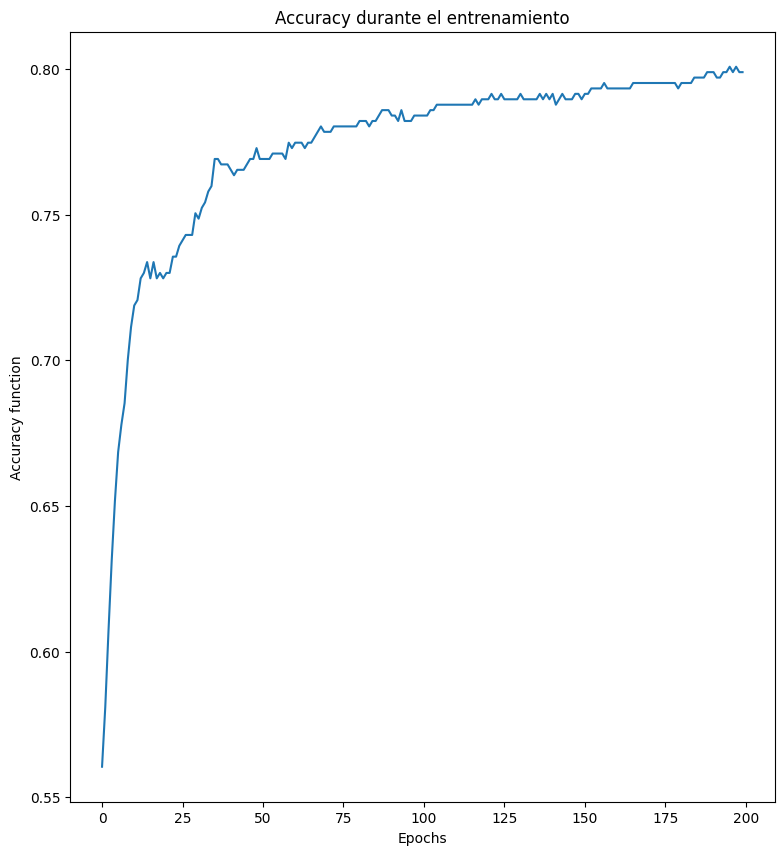

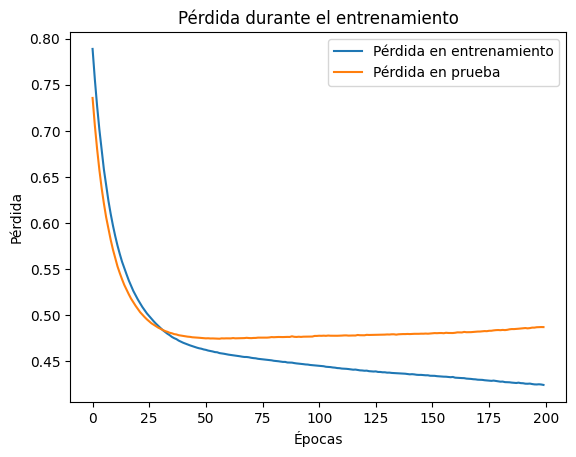

In [13]:
#Ver el performance del modelo en el entrenamiento (accuracy)
fig = plt.figure(figsize=(20,10))
plt.subplot(122)
plt.plot(history.history['accuracy'])
plt.xlabel('Epochs'),plt.ylabel('Accuracy function')
plt.title('Accuracy durante el entrenamiento')

# Gráfico de la pérdida durante el entrenamiento
plt.figure()
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en prueba')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


In [14]:
#Usar el modelo para predecir
Y_pred = model.predict(X_test) #predecir en términos de decimales o probabilidades 
Y_prob = (model.predict(X_test) > 0.5).astype("int32") #en términos de 1 y 0


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step


In [15]:
Y_pred[0:10]

array([[0.16942382],
       [0.35238534],
       [0.7005819 ],
       [0.68074787],
       [0.37699583],
       [0.03844885],
       [0.60041136],
       [0.07772659],
       [0.01397196],
       [0.43496644]], dtype=float32)

In [16]:
Y_prob[0:10]

array([[0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0]], dtype=int32)

In [17]:
#métricas de performance
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score) #mientras más grandes mejor

#métricas en el train
accu_train = accuracy_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))
prec_train = precision_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))
reca_train = recall_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))

#métricas en el test
accu_test = accuracy_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))
prec_test = precision_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))
reca_test = recall_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))

print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step
 	 Accu 	 Prec 	 Reca
 Train 	 0.801 	 0.763 	 0.620
  Test 	 0.727 	 0.641 	 0.506


**Ejemplo Multiclase**

- Aunque las salidas de la red neuronal están limitadas a un rango de valores entre 0 y 1, no se garantiza que la suma de estos sea igual a 1
- Transformar las salidas para que puedan ser usadas como probabilidades ayuda mucho a la interpretabilidad de las predicciones
- Transformación Softmax

$$\hat{p}_{l,i}^{*} = \frac{e^{\hat{y}_{l,i}}}{\sum{e^{\hat{y}_{l,i}}}}$$

- $\hat{y}_{1}=0.25$, $\hat{y}_{2}=0.76$, $\hat{y}_{3}=0.1$

- $\hat{p}_{1}=0.3099$, $\hat{p}_{2}=0.4717$, $\hat{p}_{3}=0.2184$

In [18]:
#Librerías
import pandas as pd
from sklearn import datasets
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
#from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
#from tensorflow.keras.optimizers import SGD

In [19]:
#Datos
iris = datasets.load_iris()
X = iris.data
Y = iris.target
Y #tres tipos de flores

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [20]:
X[0:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [21]:
#Distribucion de la variable de salida
unique_values = np.unique(Y)
counts = np.bincount(Y)
 
print("Valores:", unique_values)
print("Cuenta:", counts[unique_values])

Valores: [0 1 2]
Cuenta: [50 50 50]


In [22]:
#creamos la variable target a dummies para poderla trabajar en la red neuronal
dummy_y = to_categorical(Y).astype(int)

In [23]:
dummy_y[0:10]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [24]:
#Dividimos los datos en test y train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y,
                                                    test_size=0.2, random_state=42)

In [25]:
#Construcción de la red neuronal
model = Sequential()
model.add(Dense(2, activation='relu', input_shape=(4,)))
model.add(Dense(3, activation='softmax'))#salida

#Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Entrenar el modelo
history = model.fit(X_train, y_train, 
                   epochs=100, 
                   validation_data=(X_test,y_test), verbose=0)



/Users/isavalladolid/.local/share/virtualenvs/isavalladolid-aOww6lJz/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


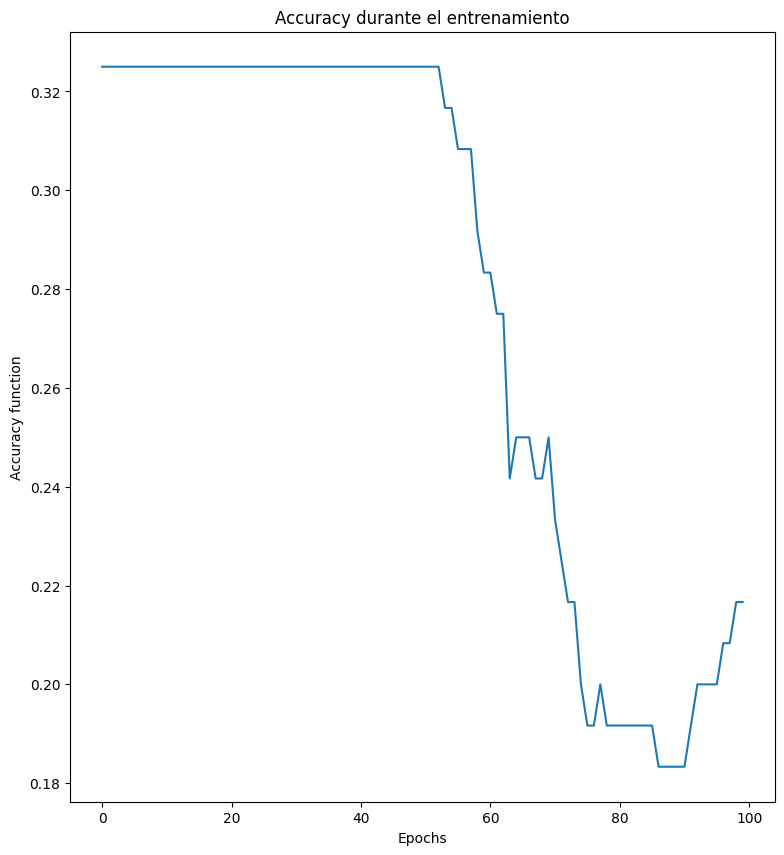

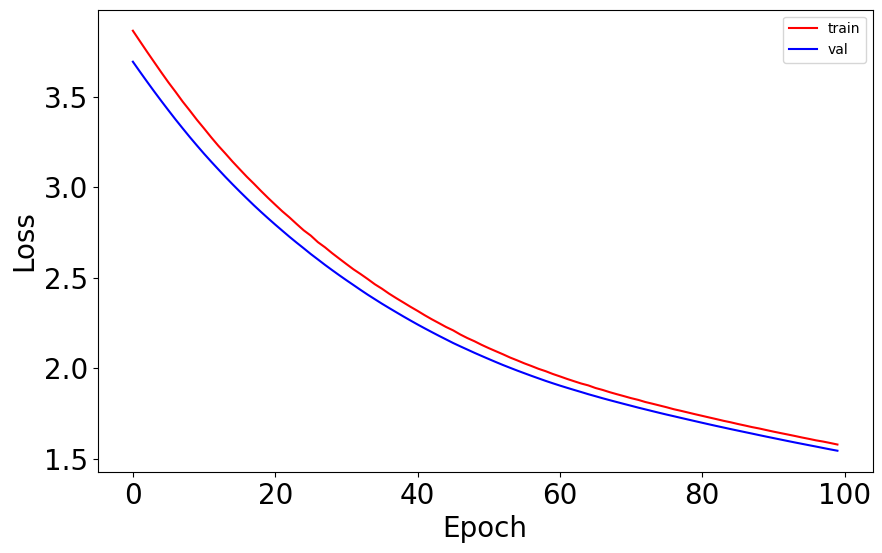

In [26]:
#Ver el performance del modelo en el entrenamiento (accuracy)
fig = plt.figure(figsize=(20,10))
plt.subplot(122)
plt.plot(history.history['accuracy'])
plt.xlabel('Epochs'),plt.ylabel('Accuracy function')
plt.title('Accuracy durante el entrenamiento')

#Graficar el categorical crossentropy (loss o funcion de perdida)
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot((history.history['loss']), 'r', label='train')
ax.plot((history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [27]:
#Predecir con el modelo
Y_pred = model.predict(X_test) # en términos de probabilidades
Y_prob = np.argmax(Y_pred, axis=1) #en términos de 1 y 0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [28]:
Y_pred[0:10]

array([[0.24588293, 0.38157454, 0.37254247],
       [0.04597994, 0.361758  , 0.5922621 ],
       [0.35196596, 0.3506952 , 0.29733875],
       [0.20246972, 0.389847  , 0.40768334],
       [0.20655236, 0.38921434, 0.40423334],
       [0.05466486, 0.36932075, 0.5760144 ],
       [0.15444995, 0.39436266, 0.45118734],
       [0.15442662, 0.39436328, 0.45121002],
       [0.26541224, 0.37688392, 0.35770386],
       [0.19271831, 0.3912181 , 0.41606358]], dtype=float32)

In [29]:
Y_prob[0:10]

array([1, 2, 0, 2, 2, 2, 2, 2, 1, 2])

In [30]:
#Hacer ingenería en reversa, para dejar las predicciones en el formato original que teníamos de las "Y"
uniques, ids = np.unique(Y, return_inverse=True)
dummy_y = to_categorical(ids, len(uniques))
reverse = uniques[dummy_y.argmax(1)]
X_train, X_test, y_train, y_test = train_test_split(X, reverse,
                                                    test_size=0.2, random_state=42)

In [31]:
#Métricas de performance
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score)

#métricas en el train
Y_proba= model.predict(X_train)
Y_pred= np.argmax(Y_proba, axis=1)

accu_train = accuracy_score(y_train, Y_pred)
prec_train = precision_score(y_train, Y_pred,average='weighted')
reca_train = recall_score(y_train, Y_pred,average='weighted')


#métricas en el test
Y_proba= model.predict(X_test)
Y_pred= np.argmax(Y_proba, axis=1)

accu_test = accuracy_score(y_test, Y_pred)
prec_test = precision_score(y_test, Y_pred,average='weighted')
reca_test = recall_score(y_test, Y_pred,average='weighted')
print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
 	 Accu 	 Prec 	 Reca
 Train 	 0.217 	 0.165 	 0.217
  Test 	 0.300 	 0.229 	 0.300
